<a href="https://colab.research.google.com/github/R-it-a/Estrutura-de-dados/blob/main/formacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
!pip install swifter
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import pandas as pd

educacao_2020 = pd.read_csv(
   '/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv',
    error_bad_lines=False,
    sep = ";",
    encoding = 'ISO-8859-1',
   usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA", "Q002",]
)

# Transforma a variável TP_SEXO em binária
#educacao_2020 = pd.get_dummies(educacao_2020, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2020['TP_COR_RACA'] = educacao_2020['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2020 = educacao_2020.dropna()

# Carrega o dataframe de 2011
educacao_2011 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2011.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA', 'Q003'])

# Transforma a variável TP_SEXO em binária
#educacao_2011 = pd.get_dummies(educacao_2011, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2011['TP_COR_RACA'] = educacao_2011['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2011 = educacao_2011.dropna()

# Carrega o dataframe de 2018
educacao_2018 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2018.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA', "Q002"])

# Transforma a variável TP_SEXO em binária
#educacao_2018 = pd.get_dummies(educacao_2018, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2018['TP_COR_RACA'] = educacao_2018['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2018 = educacao_2018.dropna()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-2-43d47c452cff>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  educacao_2020 = pd.read_csv(


In [ ]:
educacao_2011.head

<bound method NDFrame.head of         TP_SEXO TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
0             M      branco       577.1       576.0       575.5       737.1   
2             M      branco       491.4       435.3       491.6       467.8   
3             M      branco       424.4       422.4       360.8       406.7   
4             M       pardo       648.8       583.2       571.5       769.3   
5             M      branco       529.4       648.4       638.6       591.1   
...         ...         ...         ...         ...         ...         ...   
5366922       F      branco       489.9       432.7       558.2       424.0   
5366925       M      branco       473.1       493.2       523.4       654.3   
5366928       F       pardo       686.8       638.7       641.7       744.3   
5366929       M       pardo       543.8       466.4       597.9       639.3   
5366930       F       pardo       423.5       529.5       628.4       598.1   

        Q002 Q003 Q00

In [ ]:
educacao_2011 = educacao_2011.rename(columns={'Q002': 'Q001', 'Q003': 'Q002'})


In [ ]:
educacao_2011.head

<bound method NDFrame.head of         TP_SEXO TP_COR_RACA  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
0             M      branco       577.1       576.0       575.5       737.1   
2             M      branco       491.4       435.3       491.6       467.8   
3             M      branco       424.4       422.4       360.8       406.7   
4             M       pardo       648.8       583.2       571.5       769.3   
5             M      branco       529.4       648.4       638.6       591.1   
...         ...         ...         ...         ...         ...         ...   
5366922       F      branco       489.9       432.7       558.2       424.0   
5366925       M      branco       473.1       493.2       523.4       654.3   
5366928       F       pardo       686.8       638.7       641.7       744.3   
5366929       M       pardo       543.8       466.4       597.9       639.3   
5366930       F       pardo       423.5       529.5       628.4       598.1   

        Q001 Q002 Q00

<Axes: xlabel='Q002', ylabel='NU_NOTA_MT'>

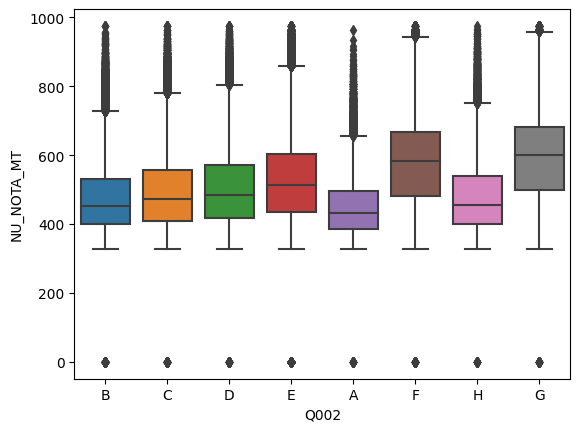

In [ ]:
import seaborn as sns

sns.boxplot(x="Q002", y="NU_NOTA_MT", data=educacao_2020)


ValueError: ignored

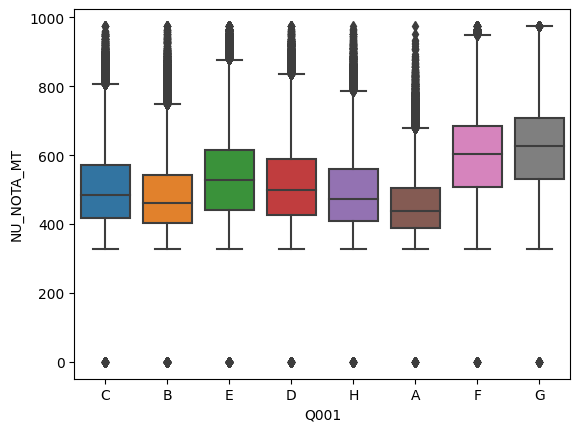

In [ ]:
# Gráfico de boxplot para nível de escolaridade do pai em 2020
sns.boxplot(x="Q001", y="NU_NOTA_MT", data=educacao_2020)

# Gráfico de boxplot para nível de escolaridade da mãe em 2011
educacao_2011 = educacao_2011.rename(columns={"Q002": "Q001", "Q003": "Q002"})
sns.boxplot(x="Q001", y="NU_NOTA_MT", data=educacao_2011)

# Gráfico de violinplot para nível de escolaridade da mãe em 2018
sns.violinplot(x="Q001", y="NU_NOTA_MT", data=educacao_2018)


In [ ]:
# Renomeia a variável Q002 para Q001 no dataframe de 2020
educacao_2020 = educacao_2020.rename(columns={'Q002': 'Q001'})

# Adiciona uma variável ANO para identificar o ano de cada dataframe
educacao_2011['ANO'] = 2011
educacao_2018['ANO'] = 2018
educacao_2020['ANO'] = 2020

# Une os dataframes em um único dataframe
educacao = pd.concat([educacao_2011, educacao_2018, educacao_2020])


In [ ]:
# Agrupa as notas de matemática por nível de formação da mãe e por sexo/gênero
notas_mae_sexo = educacao.groupby(['Q001', 'TP_SEXO', 'ANO']).agg({'NU_NOTA_MT': 'mean'}).reset_index()


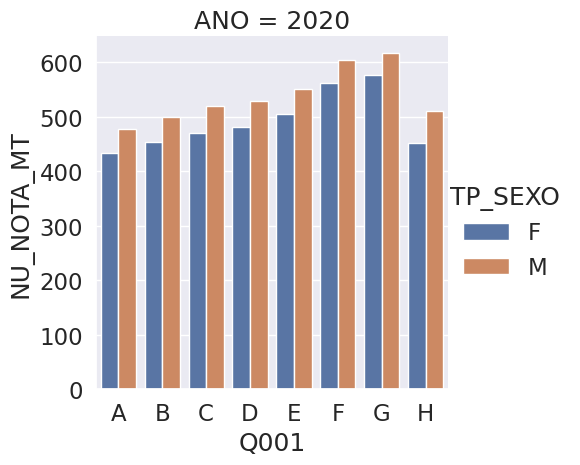

In [ ]:
import seaborn as sns

# Plota o gráfico
sns.catplot(x='Q001', y='NU_NOTA_MT', hue='TP_SEXO', col='ANO', data=notas_mae_sexo, kind='bar')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega os dataframes
educacao_2011 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2011.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'TP_SEXO', 'TP_COR_RACA', 'Q003'])
educacao_2018 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2018.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'TP_SEXO', 'TP_COR_RACA', 'Q002'])
educacao_2020 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'TP_SEXO', 'TP_COR_RACA', 'Q001'])

# Renomeia a coluna de nível de formação da mãe para o mesmo nome em todos os dataframes
educacao_2011 = educacao_2011.rename(columns={'Q003': 'Q001'})
educacao_2018 = educacao_2018.rename(columns={'Q002': 'Q001'})

# Cria uma coluna com o ano em que os dados foram coletados em cada dataframe
educacao_2011['ano'] = 2011
educacao_2018['ano'] = 2018
educacao_2020['ano'] = 2020

# Concatena os dataframes
educacao = pd.concat([educacao_2011, educacao_2018, educacao_2020])

# Transforma a variável TP_COR_RACA em categórica
educacao['TP_COR_RACA'] = educacao['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Agrupa os dados por nível de formação da mãe, sexo, gênero e ano e calcula


<ipython-input-30-79c5c3fd09c4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(data['Q001'], rotation=45)


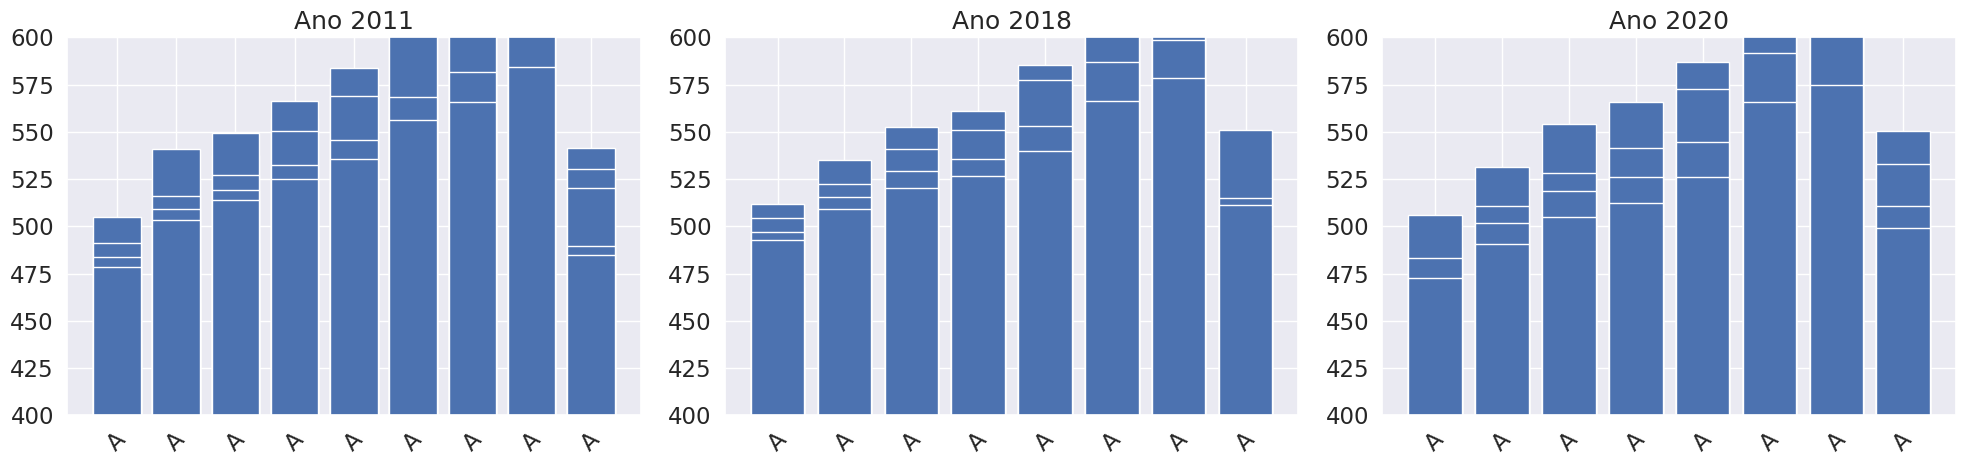

In [ ]:
# Agrupa os dados por nível de formação da mãe, sexo, gênero e ano e calcula a média das notas de matemática
educacao = educacao.groupby(['Q001', 'TP_SEXO', 'TP_COR_RACA', 'ano']).mean().reset_index()

# Plota os gráficos
fig, axs = plt.subplots(ncols=3, figsize=(20,5))

# Gráfico por ano
for i, ano in enumerate(educacao['ano'].unique()):
    data = educacao.loc[educacao['ano']==ano]
    axs[i].set_title(f'Ano {ano}')
    axs[i].set_ylim(400, 600)
    axs[i].set_xticklabels(data['Q001'], rotation=45)
    axs[i].bar(data['Q001'], data['NU_NOTA_MT'])

# Configurações adicionais
plt.tight_layout()
plt.show()


AttributeError: ignored

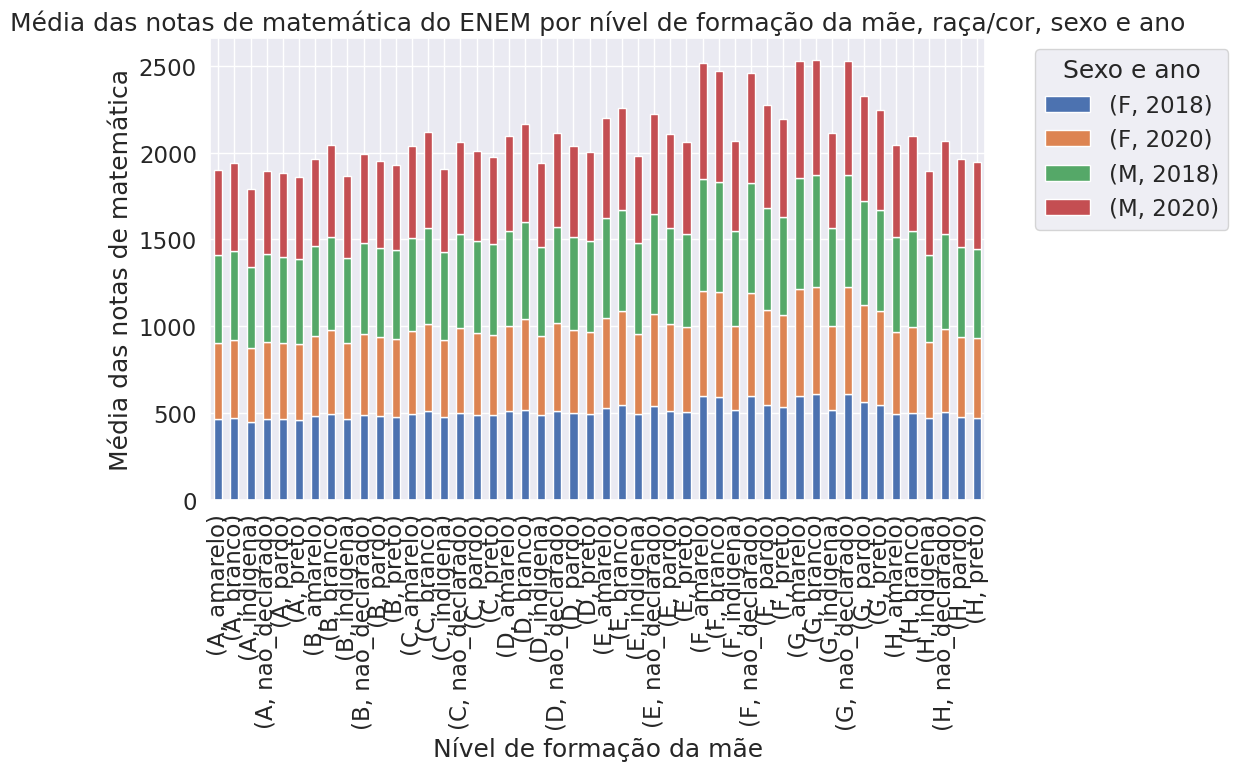

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega os dataframes
A = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2011.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'TP_SEXO', 'TP_COR_RACA', 'Q003'])
B = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2018.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'TP_SEXO', 'TP_COR_RACA', 'Q002'])
C = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'TP_SEXO', 'TP_COR_RACA', 'Q001'])

# Renomeia a coluna de nível de formação da mãe para o mesmo nome em todos os dataframes
A = A.rename(columns={'Q003': 'Q001'})
B = B.rename(columns={'Q002': 'Q001'})

# Cria uma coluna com o ano em que os dados foram coletados em cada dataframe
A['ano'] = 2011
B['ano'] = 2018
C['ano'] = 2020

# Concatena os dataframes
D = pd.concat([A, B, C])

# Transforma a variável TP_COR_RACA em categórica
D['TP_COR_RACA'] = D['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Agrupa os dados por nível de formação da mãe, sexo, gênero e ano e calcula a média das notas
E = D.groupby(['Q001', 'TP_SEXO', 'TP_COR_RACA', 'ano']).mean()['NU_NOTA_MT'].reset_index()

# Filtra apenas os dados dos anos de 2018 e 2020
F = E[(E['ano'] == 2018) | (E['ano'] == 2020)]

# Pivotear os dados
G = F.pivot_table(values='NU_NOTA_MT', index=['Q001', 'TP_COR_RACA'], columns=['TP_SEXO', 'ano'])

# Criar gráfico de barras empilhadas
H = G.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicionar título e legenda aos eixos do gráfico
H.set_title('Média das notas de matemática do ENEM por nível de formação da mãe, raça/cor, sexo e ano')
H.set_xlabel('Nível de formação da mãe')
H.set_ylabel('Média das notas de matemática')
H.legend(title='Sexo e ano', bbox_to_anchor=(1.05, 1), loc='upper left')
# Definir os nomes das colunas
H.columns.names = ['Sexo', 'Ano']

# Definir os nomes dos índices
H.index.names = ['Nível de formação da mãe', 'Raça/Cor']

# Mostrar o gráfico
plt.show()



In [ ]:
import seaborn as sns

# Rename the columns for consistency across the years
educacao_2011 = educacao_2011.rename(columns={'Q003': 'Q002'})
#educacao_2018 = educacao_2018.rename(columns={'Q002': 'Q001'})

# Concatenate the dataframes for the three years
educacao = pd.concat([educacao_2011, educacao_2018, educacao_2020])

# Rename the mother's education level columns to be consistent across the years
educacao = educacao.rename(columns={'Q001': 'Q002'})

# Map the mother's education level values to consistent labels across the years
educacao['Q002'] = educacao['Q002'].replace({
    'A': 'Nenhum',
    'B': 'Ensino fundamental incompleto',
    'C': 'Ensino fundamental completo',
    'D': 'Ensino médio incompleto',
    'E': 'Ensino médio completo',
    'F': 'Ensino superior incompleto',
    'G': 'Ensino superior completo'
})

# Plot the graph
sns.catplot(data=educacao, x='Q002', y='NU_NOTA_MT', col='TP_SEXO', row='TP_COR_RACA', kind='bar')


KeyboardInterrupt: ignored

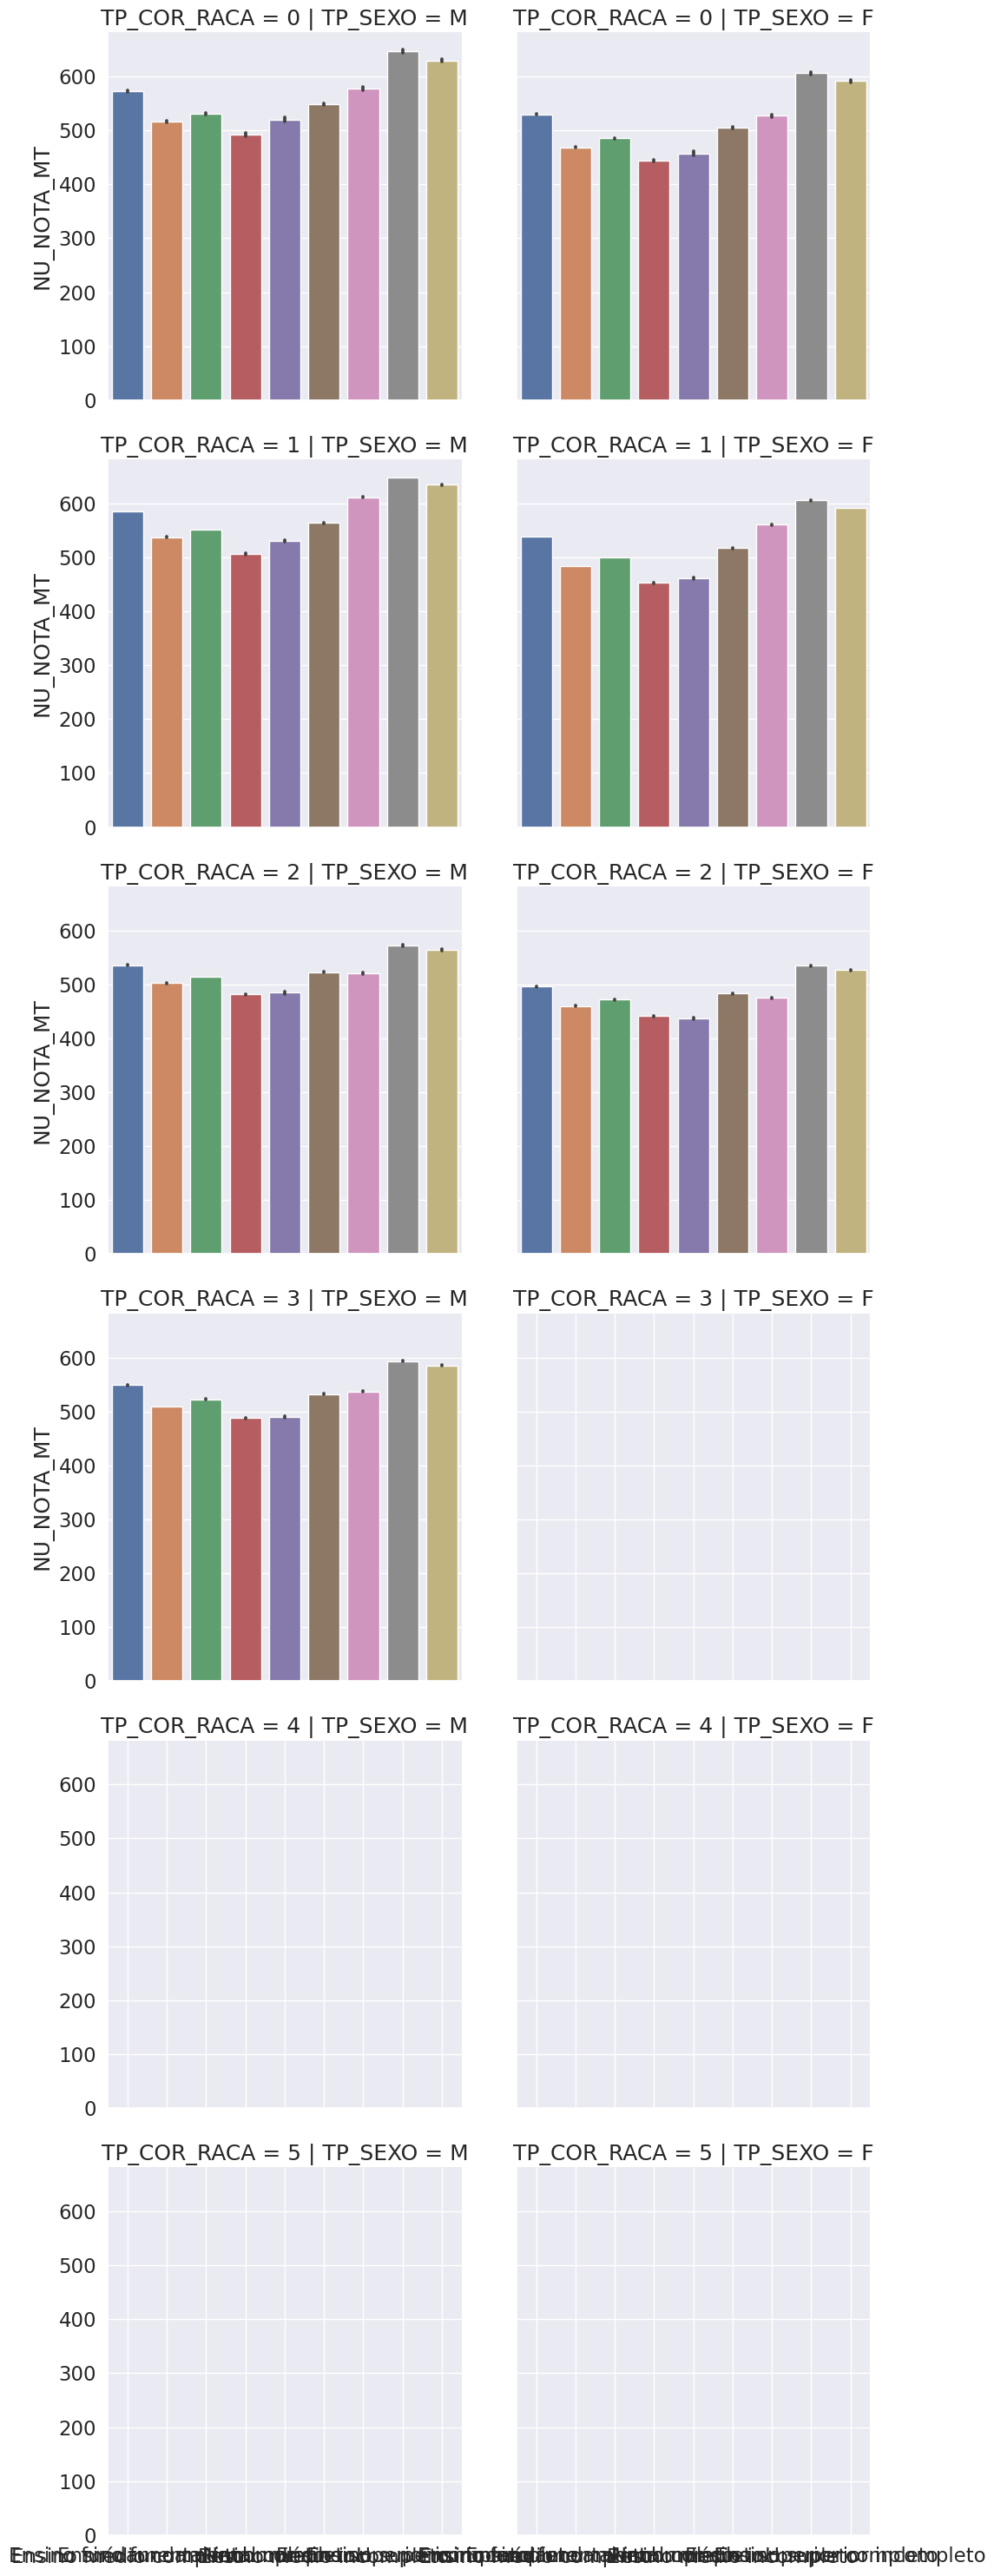

In [ ]:
import pandas as pd
import seaborn as sns

# Rename the columns for consistency across the years
educacao_2011 = educacao_2011.rename(columns={'Q003': 'Q002'})
#educacao_2018 = educacao_2018.rename(columns={'Q002': 'Q001'})

# Concatenate the dataframes for the three years
educacao = pd.concat([educacao_2011, educacao_2018, educacao_2020])

# Rename the mother's education level columns to be consistent across the years
educacao = educacao.rename(columns={'Q001': 'Q002'})

# Map the mother's education level values to consistent labels across the years
educacao['Q002'] = educacao['Q002'].replace({
    'A': 'Nenhum',
    'B': 'Ensino fundamental incompleto',
    'C': 'Ensino fundamental completo',
    'D': 'Ensino médio incompleto',
    'E': 'Ensino médio completo',
    'F': 'Ensino superior incompleto',
    'G': 'Ensino superior completo'
})

# Plot the graph
sns.catplot(data=educacao, x='Q002', y='NU_NOTA_MT', col='TP_SEXO', row='TP_COR_RACA', kind='bar')


In [ ]:
import seaborn as sns

# Rename the columns for consistency across the years
educacao_2011 = educacao_2011.rename(columns={'Q003': 'Q002'})
#educacao_2018 = educacao_2018.rename(columns={'Q002': 'Q001'})

# Concatenate the dataframes for the three years
educacao = pd.concat([educacao_2011, educacao_2018, educacao_2020])

# Rename the mother's education level columns to be consistent across the years
educacao = educacao.rename(columns={'Q001': 'Q002'})

# Map the mother's education level values to consistent labels across the years
educacao['Q002'] = educacao['Q002'].replace({
    'A': 'Nenhum',
    'B': 'Ensino fundamental incompleto',
    'C': 'Ensino fundamental completo',
    'D': 'Ensino médio incompleto',
    'E': 'Ensino médio completo',
    'F': 'Ensino superior incompleto',
    'G': 'Ensino superior completo'
})

# Plot the graph for race
g = sns.catplot(data=educacao, x='Q002', y='NU_NOTA_MT', col='ano', row='TP_COR_RACA', kind='bar', hue='TP_SEXO', order=['Nenhum', 'Ensino fundamental incompleto', 'Ensino fundamental completo', 'Ensino médio incompleto', 'Ensino médio completo', 'Ensino superior incompleto', 'Ensino superior completo'])

# Set the titles of the subplots
g.set_titles(row_template='{row_name} - Raça', col_template='{col_name} - Ano')


KeyError: ignored

In [ ]:
import seaborn as sns

# Filtra apenas as colunas relevantes para análise
df_2011 = educacao_2011[['NU_NOTA_MT', 'TP_COR_RACA', 'Q003']]
df_2018 = educacao_2018[['NU_NOTA_MT', 'TP_COR_RACA', 'Q002']]
df_2020 = educacao_2020[['NU_NOTA_MT', 'TP_COR_RACA', 'Q002']]

# Renomeia as colunas
df_2011 = df_2011.rename(columns={'Q003': 'Q002'})
df_2018 = df_2018.rename(columns={'Q002': 'Q002'})
df_2020 = df_2020.rename(columns={'Q002': 'Q002'})

# Junta os dataframes
df = pd.concat([df_2011, df_2018, df_2020])

# Transforma a variável Q002 em categórica
df['Q002'] = df['Q002'].replace({
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'
})

# Cria os boxplots
sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='Q002', data=df)


KeyError: ignored